In [54]:

# import libraries for plotting and data manipulation
import matplotlib.pyplot as plt 
import numpy as np 

# import datasets
from sklearn import datasets

# import classfiers 
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# import model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay 


In [46]:
# ==============================================================================
# Load data and select features
# ==============================================================================

wine = datasets.load_wine() 
features = [0, 10] 
X = wine.data[:, features]
y = wine.target
feature_names = [wine.feature_names[i] for i in features]



In [48]:
# ==============================================================================
# Split into training and test data
# ==============================================================================

# Split data into training and test data (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [49]:
# ==============================================================================
# Standardize features 
# ==============================================================================

# Initialize StandardScaler and calculate mean and standard deviation of training data 
sc = StandardScaler() 
sc.fit(X_train) 

# Standardize training and test data 
X_train_sc = sc.transform(X_train) 
X_test_sc = sc.transform(X_test) 

# Print mean and standard deviation of standardized data 
print('Mean of standardized training data: ', X_train_sc.mean(axis=0)) 
print('Standard deviation of standardized training data: ', X_train_sc.std(axis=0)) 

Mean of standardized training data:  [4.67726216e-15 7.64621341e-16]
Standard deviation of standardized training data:  [1. 1.]


In [73]:
# ==============================================================================
# The Perceptron classifier 
# ============================================================================== 

# initialize the Perceptron classifier
ppn = Perceptron(max_iter=1, eta0 = 0.0001) 

# train the Perceptron classifier 
ppn.fit(X_train_sc, y_train) 

# predict the test data 
y_pred_ppn = ppn.predict(X_test_sc) 

# calculate the accuracy of the Perceptron classifier 
accuracy_ppn = accuracy_score(y_test, y_pred_ppn) 

# print the accuracy of the Perceptron classifier
print('Accuracy of the Perceptron classifier: {0:.2f}'.format(accuracy_ppn))
print('Misclassified samples Perceptron: {0}'.format((y_test != y_pred_ppn).sum())) 


Accuracy of the Perceptron classifier: 0.80
Misclassified samples Perceptron: 11


c:\Users\anekl\anaconda3\envs\dat200_env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [72]:
# ============================================================================== 
# The Logistic Regression classifier
# ==============================================================================

# initialize the Logistic Regression classifier
log_reg = LogisticRegression(C=10) 

# train the Logistic Regression classifier
log_reg.fit(X_train_sc, y_train)

# predict the test data
y_pred_log = log_reg.predict(X_test_sc)

# calculate the accuracy of the Logistic Regression classifier
accuracy_log = accuracy_score(y_test, y_pred_log)

# print the accuracy of the Logistic Regression classifier
print('Accuracy of the Logistic Regression classifier: {0:.2f}'.format(accuracy_log))
print('Misclassified samples Logistic Regression: {0}'.format((y_test != y_pred_log).sum()))



Accuracy of the Logistic Regression classifier: 0.85
Misclassified samples Logistic Regression: 8


In [71]:
# ==============================================================================
# The Support Vector Machine classifier
# =================================================================

# initialize the Support Vector Machine classifier
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1)

# train the Support Vector Machine classifier
svm.fit(X_train_sc, y_train)

# predict the test data
y_pred_svm = svm.predict(X_test_sc)

# calculate the accuracy of the Support Vector Machine classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# print the accuracy of the Support Vector Machine classifier
print('Accuracy of the Support Vector Machine classifier: {0:.2f}'.format(accuracy_svm))
print('Misclassified samples SVM: {0}'.format((y_test != y_pred_svm).sum()))

Accuracy of the Support Vector Machine classifier: 0.91
Misclassified samples SVM: 5


Accuracy of the Decision Tree classifier: 0.87
Misclassified samples Decision Tree: 7


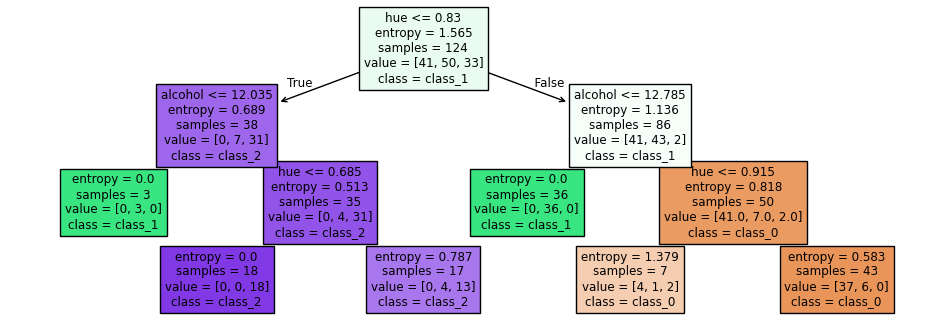

In [70]:
# ==============================================================================
# The Decision Tree classifier
# ==============================================================================

# initialize the Decision Tree classifier
tree = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_split=2) 

# train the Decision Tree classifier
tree.fit(X_train, y_train)

# predict the test data
y_pred_tree = tree.predict(X_test)

# calculate the accuracy of the Decision Tree classifier
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# print the accuracy of the Decision Tree classifier
print('Accuracy of the Decision Tree classifier: {0:.2f}'.format(accuracy_tree))
print('Misclassified samples Decision Tree: {0}'.format((y_test != y_pred_tree).sum()))

plt.figure(figsize=(12, 4))
plot_tree(tree, filled=True, feature_names=feature_names, class_names=wine.target_names)
plt.show()


In [68]:
# ==============================================================================
# The Random Forest classifier
# ==============================================================================

# initialize the Random Forest classifier
forest = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=6) 

# train the Random Forest classifier
forest.fit(X_train, y_train)

# predict the test data
y_pred_forest = forest.predict(X_test)

# calculate the accuracy of the Random Forest classifier
accuracy_forest = accuracy_score(y_test, y_pred_forest)

# print the accuracy of the Random Forest classifier
print('Accuracy of the Random Forest classifier: {0:.2f}'.format(accuracy_forest))
print('Misclassified samples Random Forest: {0}'.format((y_test != y_pred_forest).sum()))



Accuracy of the Random Forest classifier: 0.89
Misclassified samples Random Forest: 6


In [69]:
# ==============================================================================
# The K-Nearest Neighbors classifier
# ==============================================================================

# initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors = 10, p = 1) 

# train the K-Nearest Neighbors classifier
knn.fit(X_train_sc, y_train)

# predict the test data
y_pred_knn = knn.predict(X_test_sc)

# calculate the accuracy of the K-Nearest Neighbors classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# print the accuracy of the K-Nearest Neighbors classifier
print('Accuracy of the K-Nearest Neighbors classifier: {0:.2f}'.format(accuracy_knn))
print('Misclassified samples KNN: {0}'.format((y_test != y_pred_knn).sum()))


Accuracy of the K-Nearest Neighbors classifier: 0.91
Misclassified samples KNN: 5


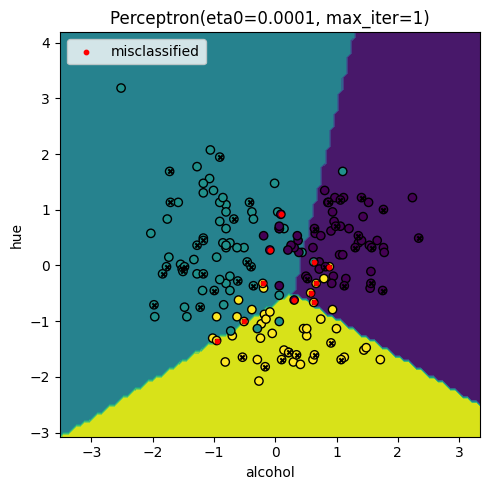

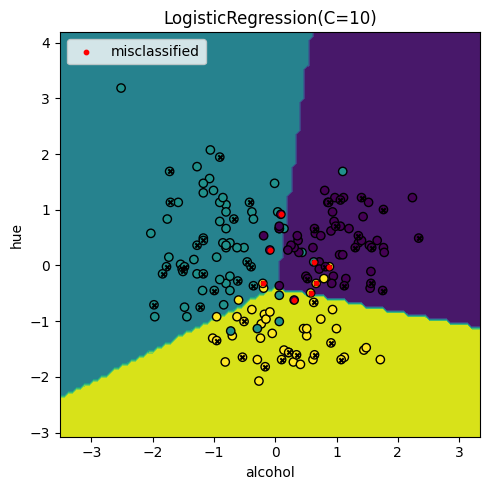

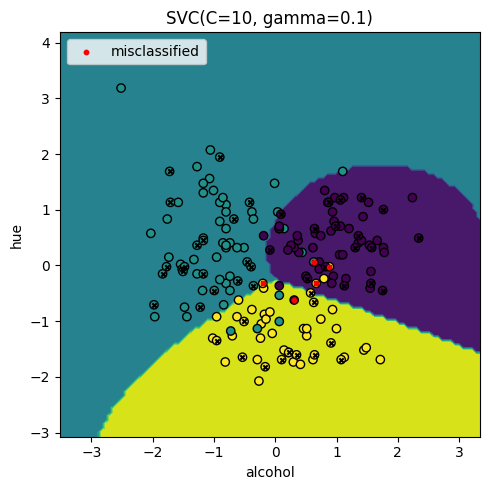

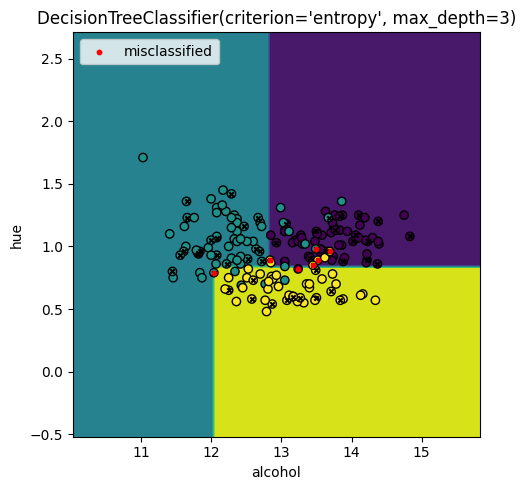

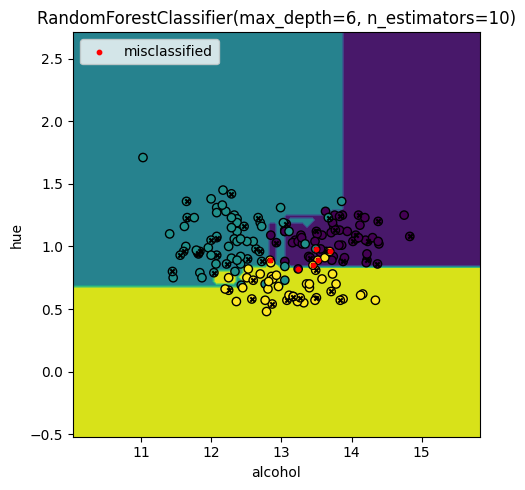

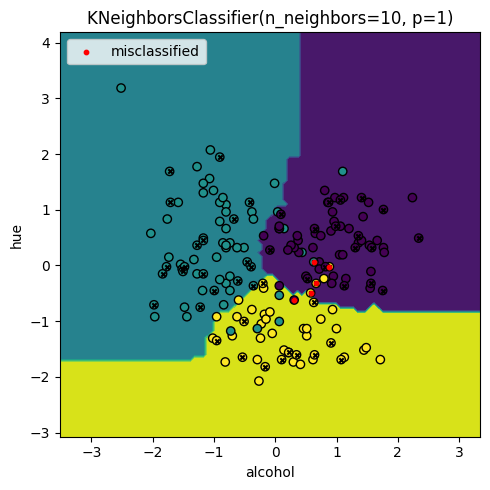

In [75]:
# ==============================================================================
# Plot the decision regions for all classifiers
# ==============================================================================
for classifier in [ppn, log_reg, svm,tree, forest, knn]:
    

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        
    if classifier in [tree, forest]:
        y_pred = classifier.predict(X_test)
        
        plot = DecisionBoundaryDisplay.from_estimator(
            estimator=classifier,
            X=X,
            alpha=1.0,
            ax=ax,
            response_method="predict",
            xlabel=feature_names[0],
            ylabel=feature_names[1],
        )

        plot.ax_.scatter(X[:, 0], X[:, 1], c=y, marker="o", edgecolor="k")

        # Highlight test samples
        plot.ax_.scatter(
            X_test[:, 0],
            X_test[:, 1],
            marker="x",
            s=10,
            c="k",
        )

        # Highlight misclassified test samples
        plot.ax_.scatter(
            X_test[y_test != y_pred, 0],
            X_test[y_test != y_pred, 1],
            marker="o",
            s=10,
            c="r",
            facecolors="none",
            label="misclassified",
        )

        plt.legend(loc="upper left")
        plt.title(str(classifier))
        plt.tight_layout()
        plt.show()
        
    else:
        y_pred = classifier.predict(X_test_sc)
    
        X_combined_sc = np.vstack((X_train_sc, X_test_sc))

        y_combined = np.hstack((y_train, y_test))
        
        plot = DecisionBoundaryDisplay.from_estimator(
            estimator=classifier,
            X=X_combined_sc,
            alpha=1.0,
            ax=ax,
            response_method="predict",
            xlabel=feature_names[0],
            ylabel=feature_names[1],
        )

        plot.ax_.scatter(X_combined_sc[:, 0], X_combined_sc[:, 1], c=y_combined, marker="o", edgecolor="k")

        # Highlight test samples
        plot.ax_.scatter(
            X_test_sc[:, 0],
            X_test_sc[:, 1],
            marker="x",
            s=10,
            c="k",
        )

        # Highlight misclassified test samples
        plot.ax_.scatter(
            X_test_sc[y_test != y_pred, 0],
            X_test_sc[y_test != y_pred, 1],
            marker="o",
            s=10,
            c="r",
            facecolors="none",
            label="misclassified",
        )

        plt.legend(loc="upper left")
        plt.title(str(classifier))
        plt.tight_layout()
        plt.show()